# Klasifikasi dengan Decision Tree dan Pycaret

Alicia Arifin<br>
2021492001<br>
Statistika<br>


Data yang akan digunakan adalah data tentang penyakit jantung. Data didapatkan dari pelatihan sertifikasi BNSP Matana University pada tanggal 17-18 May 2025. Data berisikan tentang variabel-variabel yang dapat menyebabkan munculnya penyakit jantung pada pasien. Variabel yang disediakan adalah <br>
•	Age			: umur <br>
•	Sex			: jenis kelamin<br>
•	ChestPainType		: tipe sakit dada<br>
•	RestingBP		: tekanan darah saat istirahat<br>
•	Cholesterol		: kadar kolesterol<br>
•	FastingBS		: gula darah saat berpuasa<br>
•	RestingECG		: electrocardiogram<br>
•	MaxHR			: nilai maksimum detak jantung (heart rate)<br>
•	ExcerciseAngina	: pasien nyeri dada saat olahraga<br>
•	Oldpeak		<br>
•	ST_Slope	<br>
•	HeartDisease		: pasien terkena penyakit jantung atau tidak<br>
<br>
Data tentang penyakit jantung ini digunakan untuk memprediksi apakah suatu individu mengalami serangan jantung atau tidak berdasarkan gejala yang dialami. Data ini dilakukan klasifikasi dengan decision tree dan metode klasifikasi lainnya menggunakan library pycaret untuk mengetahui model terbaik untuk memprediksi penyakit jantung. Data ’heart.csv’ diimport ke dalam google collab atau jupiter menggunakan library pandas. Sebelum memulai menganalisis klasifikasi, library yang diperlukan adalah pandas, numpy, dan matplotlib.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret

Library pycaret dijalankan satu kali saja. Setelah menginstall ulang pycaret, google collab akan secara deafult akan menyarankan merestart ulang python. Lakukan restart ulang python, lalu, code `!pip install pycaret` dapat diberikan tanda # di depan agar tidak dijalankan lagi.
<br><br>
Hal pertama yang akan dilakukan adalh mengimport data ke dalam google collab. Upload file 'heart.csv' pada files di menu files. Lalu, data sudah dapat diimport ke dalam google colab menggunakan library `pandas`.

In [44]:
df = pd.read_csv("heart.csv")
df # memanggil data heart.csv
# sebuah dataset untuk memprediksi heart disease, variabel target : heart disease, dan prediksi menggunakan klasifikasi.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Pada data heart, terdapat 918 baris dan 12 kolom. Maka terdapat 918 sample dan 12 variabel.


Pada data heart.csv, dalam klasifikasi, variabel independen dapat berupa kategorik maupun numerik. Tipe data variabel target atau label target pada klasifikasi berupa kategorik. Secara keseluruhan, tipe data dapat dimunculkan dengan `df.info()` dan statistik deskriptif variabel numerik dapat dimunculkan dengan `df.describe()`.

In [45]:
# Penelaahan Data
df.info() # mengidentifikasi setiap tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


Variabel numerik akan muncul sebagai float dan integer. Variabel kategorik akan muncul dengan type object.

Variabel yang terbaca variabel numerik adalah RestingBP, Cholesterol, MaxHR, fasting BS, oldpeak, dan age. Variabel yang terbaca variabel kategorik adalah sex, RestingECG, ChestPainType, Exercise Angina, HeartDisease dan ST Slope. Pada kolom Non-Null Count, didapatkan bahwa variabel age dan sex memiliki nilai NA, karena variabel Age memiliki nilai yang bukan NA (non-null) sebanyak 911 dan Sex memiliki nilai yang bukan NA (non-null) sebanyak 908.
<br>
<br>
Berikut untuk statistik deskriptif dari variabel numerik

In [46]:
df.describe() # statistik deskriptif

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Pada variabel yang dibaca numerik, variabel age memiliki nilai pencilan atau outlier karena ada pasien yang umurnya 0 tahun (min age) dan 177 tahun (max age), yang mana hal tersebut tidak mungkin. Variabel restingBP, Cholesterol memiliki nilai 0 pada nilai minimum. Kedua variabel tersebut tidak mungkin memiliki nilai 0. Ketika resting blood preasure (tensi) bernilai 0, maka orang tersebut jantungnya tidak berdetak (meninggal). Seorang pasien tidak akan memiliki nilai kadar kolesterol bernilai 0. Variabel FastingBS sepertinya variabel kategorik karena nilai minimum dan maksimumnya adalah 0 dan 1. Sementara, variabel MaxHR dan Oldpeak belum ada masalah. Variabel HeartDisease merupakan variabel kategorik yang terbaca numerik karena variabel heart disease merupakan variabel target atau label target. Variabel target yang akan diprediksi pada metode klasifikasi adalah variabel kategorik.
<br><br>
Setelah melihat type data dan statistik deskriptif untuk variabel numerik, berikut akan mengeksplorasi variabel kategorik dan eksplorasi data secara keseluruhan. Langkah selanjutnya adalah melihat keunikan indikator pada variabel kategorik. Dengan melihat keunikan indikator, kita dapat melihat apakah ada nan atau Null pada variabel tersebut. Melihat keunikan indikator dapat dilakukan dengan code `df['variable'].unique()`, seperti pada coding di bawah ini.

In [47]:
#bar plot untuk variabel kategorik
# variabel kategorik pada data  : RestingECG Sex	ChestPainType  ExerciseAngina ST_Slope
print(df['Sex'].unique())
print(df['RestingECG'].unique())
print(df['ChestPainType'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())

['M' 'F' nan]
['Normal' 'ST' 'LVH']
['ATA' 'NAP' 'ASY' 'TA']
['N' 'Y']
['Up' 'Flat' 'Down']


Pada hasil output, dapat dilihat bahwa Sex tidak memiliki nilai Nan, maka nanti akan perlu mengatasi nilai NaN. Unutk mengetahui berapa banyaknya null pada setiap variabel data, dapat melakukan code `df.isnull().sum()`, seperti di bawah ini.

In [48]:
df.isnull().sum()

,0
Age,7
Sex,10
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Pada hasil jumlah banyaknya null, didapatkan bahwa variabel age memiliki nilai null sebanyak 7 dan sex memiliki null sebanyak 10. Karena adanya Null pada data masih dikatakan sedikit, untuk mengatasi nilai Null pada data akan melakukan penghapusan baris yang memiliki nilai Null. Unutk menghapus nilai Null, diperlukan code `df.dropna()`. Setelah dikeluarkan baris yang memiliki Null, akan dilakukan crosscheck lagi apakah masih terdapat nilai Null atau tidak pada data.

In [49]:
df = df.dropna()
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Data heart sudah tidak memiliki nilai Null. Kita bisa lanjutkan untuk melihat visualisasi untuk menyiapkan data untuk diklasifikasikan. Selanjutnya untuk mempersiapkan variabel, akan melakukan visualisasi. Bar plot untuk variabel kategorik dan histogram untuk variabel numerik, serta boxplot untuk mendeteksi outlier (variabel numerik) pada data.

Visualisasi variabel kategorik menggunakan barplot untuk variabel sex, restingecg, chest pain type dan st slope dijabarkan pada coding di bawah ini menggunakan library `seaborn` dan `matplotlib`.

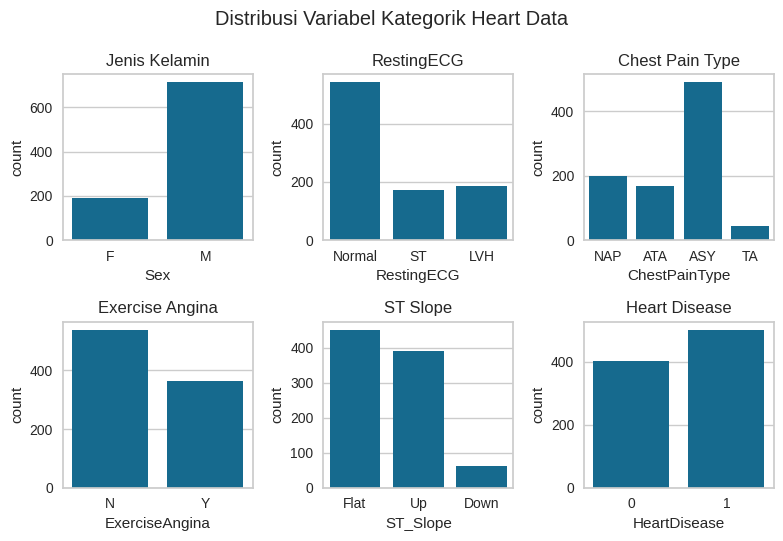

In [50]:
import seaborn as sns

plt.subplot(2,3, 1)
sns.countplot(x='Sex',data=df)
plt.title('Jenis Kelamin')

plt.subplot(2,3, 2)
sns.countplot(x='RestingECG',data=df)
plt.title('RestingECG')

plt.subplot(2,3, 3)
sns.countplot(x='ChestPainType',data=df)
plt.title('Chest Pain Type')

plt.subplot(2,3, 4)
sns.countplot(x='ExerciseAngina',data=df)
plt.title('Exercise Angina')

plt.subplot(2,3, 5)
sns.countplot(x='ST_Slope',data=df)
plt.title('ST Slope')

plt.subplot(2,3, 6)
sns.countplot(x='HeartDisease',data=df)
plt.title('Heart Disease')

plt.suptitle("Distribusi Variabel Kategorik Heart Data")
plt.tight_layout()
plt.show()


Distribusi variabel kategorik data heart. secara keseluruhan, pasien pada data ini kebanyakan laki-laki. RestingECG pasien didominasi oleh indikator normal. Tipe chestpain yang dialami pasien kebanyakan ASY dan tipe indikator yang paling sedikit adalah TA. Pada variabel excercise angina pasien kebnayakan tidak sakit ketika olahraga. Pada variabel ST slope, pasien didominasi oleh indikator flat dan up. Pada variabel heart disease, pasien kebnayakan mengalami serangan jantung atau penyakit jantung.
<br><br>
Selanjutnya, untuk mengecek distribusi variabel numerik, akan menggunakan histogram. Histogram akan dibuat menggunakan library dari `matplotlib`.

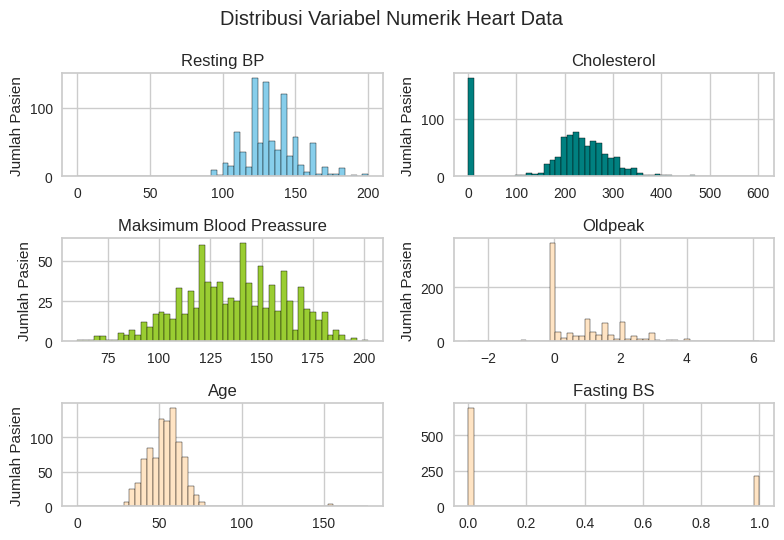

In [51]:
# Membuat histogram

plt.subplot(3,2, 1)
#RestingBP
from matplotlib import pyplot as plt
plt.hist(df['RestingBP'], bins=50, color='skyblue',
              edgecolor='black')
plt.ylabel('Jumlah Pasien')
plt.title('Resting BP')

#Cholesterol
plt.subplot(3,2, 2)
plt.hist(df['Cholesterol'], bins=50, color='teal',
              edgecolor='black')
plt.ylabel('Jumlah Pasien')
plt.title('Cholesterol')

# MaxHR
plt.subplot(3,2, 3)
plt.hist(df['MaxHR'], bins=50, color='yellowgreen',
              edgecolor='black')
plt.ylabel('Jumlah Pasien')
plt.title('Maksimum Blood Preassure')


# Oldpeak
plt.subplot(3,2, 4)
plt.hist(df['Oldpeak'], bins=50, color='bisque',
              edgecolor='black')
plt.ylabel('Jumlah Pasien')
plt.title('Oldpeak')


plt.subplot(3,2, 5)
plt.hist(df['Age'], bins=50, color='bisque',
              edgecolor='black')
plt.title('Age')
plt.ylabel('Jumlah Pasien')

plt.subplot(3,2, 6)
plt.hist(df['FastingBS'], bins=50, color='bisque',
              edgecolor='black')
plt.title('Fasting BS')


plt.suptitle("Distribusi Variabel Numerik Heart Data")
plt.tight_layout()
plt.show()
# fasting BS itu rupanya kategorik

Distribusi variabel numerik data heart.

Pada histogram variabel-variabel numerik di atas.
variabel resting bp, age, dan cholesterol terlihat bentuk agak 'bel' distribusi normal. Tetapi bentuk belnya tidak di tengah, yang berarti data skew dan data terdapat outlier yang agak jauh dibandingkan distribusinya.

- Pada Variabel Resting BP, distribusi datanya left skew atau lebih banyak daerah di sekitaran 100-175an.
- Pada variabel kolesterol, terdapat puncak yang sangat tinggi di antara 0, yang berarti frekuensi nilai 0 sangat tinggi. Maka dari itu bisa dikatakan variabel kolesterol memiliki outlier yang sangat banyak pada lowerbound. Variabel kolesterol sepertinya memiliki ekor kanan yang lumayan panjang, maka sepertinya memiliki outlier juga yang melewati upperbound.
- Pada variabel Maksimum Blood Preassure, distribusi histogramnya tidak berbentuk bel yang tinggi seperti puncak, melainkan seperti pegunungan (tidak terlalu tinggi puncaknya).
- Distribusi variabel age terlihat seperti bel, tetapi terdapat beberapa variabel yang membuat variabel age seperti rightskewed. Dapat dilihat bahwa terdapat pasien yang dideteksi 177 tahun. maka, Variabel age terdapat pencilan atau outlier.
- Variabel oldpeak tidak berdistribusi normal, dan sepertinya memiliki nilai outlier karena frekuensi diantara nilai 0 sangatlah tinggi, bahkan hingga mendominasi.
- Pada variabel fasting BS, dapat dikatakan bahwa nilai hanya 0 dan 1, maka, variabel Fasting BS merupakan variabel kategorik. Maka, akan dibuat barplot untuk variabel Fasting BS pada gambar di bawah ini.

Text(0.5, 1.0, 'FastingBS')

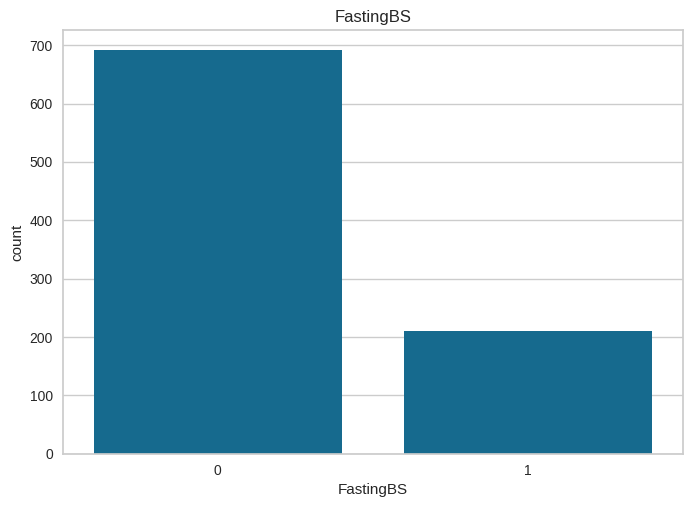

In [52]:
sns.countplot(x='FastingBS',data=df)
plt.title('FastingBS')

Pada variabel fasting BS, pasien didominasi memiliki indikator 0 hampir mencapai 700 pasien.


Setelah melihat distribusi variabel numerik, maka diperlukan pengecekan outlier dan cara mengatasinya

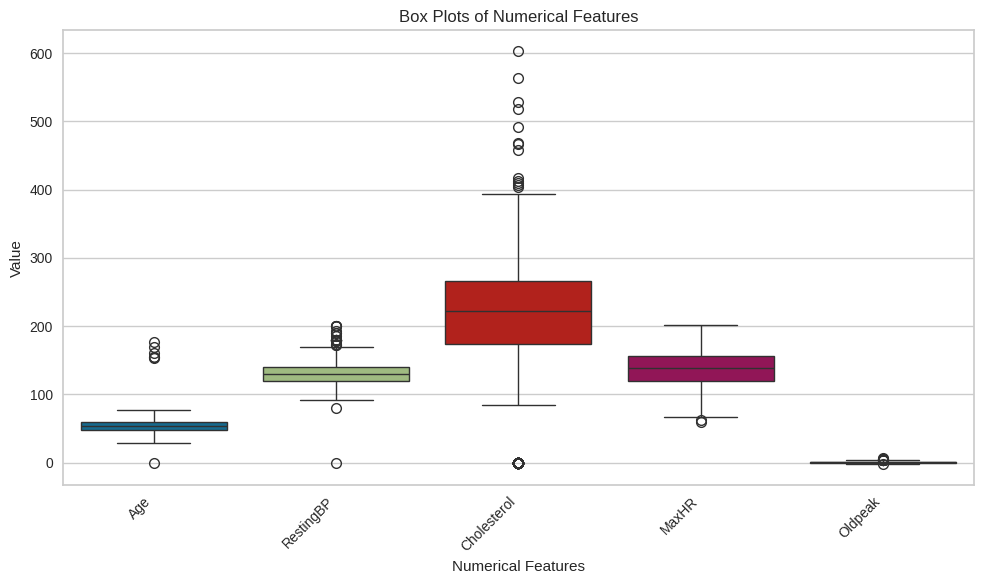

In [53]:
# Select the numerical columns for the box plots
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a single figure and axes for the box plots
plt.figure(figsize=(10, 6))

# Iterate through the numerical columns and create a box plot for each on the same axes
sns.boxplot(data=df[numerical_cols])

plt.title('Box Plots of Numerical Features')
plt.ylabel('Value')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Pada gambar boxplot di atas, semua variabel numerik memiliki outlier. Untuk mengatasi outlier atau pencilan, dapat dilakukan dengan dua cara, yaitu mengganti nilai outlier dengan lower atau upper bound, atau menghapus nilai oulier. Tujuan utama untuk mengatasi outlier adalah mempertahankan baris atau sample sebanyak-banyaknya. Menghapus nilai outlier digunakan ketika jumlah outlier pada variabel tersebut tidak besar. Mengganti nilai outlier dengan lower atau upper bound ketika nilai dari outlier variabel tersebut memiliki nilai yang cukup besar.
<br><br>
Variabel yang banyak memiliki pencilan adalah variabel RestingBP dan cholesterol. Hal tersebut ditandakan dengan bulatan yang lumayan pekat pada outlier. Khusus kedua variabel tersebut, outlier akan diatasi dengan mengganti outlier dengan upper atau lower bound.

In [54]:
# outlier cholesterol
Q1_c = df['Cholesterol'].quantile(0.25)
Q3_c = df['Cholesterol'].quantile(0.75)
IQR_c = Q3_c - Q1_c
# Menentukan batas untuk data pencilan variabel kolesterol
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c
# Mengidentifikasi data pencilan variabel kolesterol
outliers_c = df[(df['Cholesterol'] < lower_bound_c) | (df['Cholesterol'] > upper_bound_c)]
len(outliers_c) # banyak outliernya

183

Pada variabel kolesterol, terdapat 183 outlier. 183 sample berarti hampir 20% data dikeluarkan. Maka yang akan dilakukan adalah mengganti nilai outlier dengan upper dan lowerbound.

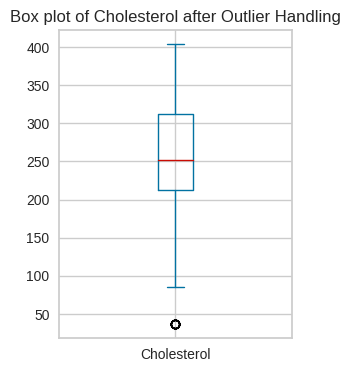

In [55]:
df['Cholesterol'] = np.where(df['Cholesterol'] > upper_bound_c, lower_bound_c,
                                np.where(df['Cholesterol'] < lower_bound_c, upper_bound_c , df['Cholesterol']))
plt.figure(figsize=(3, 4))
df['Cholesterol'].plot(kind='box')
plt.title('Box plot of Cholesterol after Outlier Handling')
plt.show()

Setelah dilakukan penanganan outlier menggunakan mengganti upper dan lower bound, pada boxplot masih terdapat outlier, maka akan dilakukan ulang penanganan outlier.

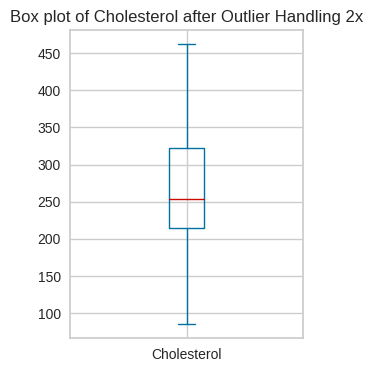

In [56]:
# penangan outlier 2x dengan mengganti upper dan lower bound
Q1_c = df['Cholesterol'].quantile(0.25)
Q3_c = df['Cholesterol'].quantile(0.75)
IQR_c = Q3_c - Q1_c
# Menentukan batas untuk data pencilan variabel kolesterol
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c
df['Cholesterol'] = np.where(df['Cholesterol'] > upper_bound_c, lower_bound_c,
                                np.where(df['Cholesterol'] < lower_bound_c, upper_bound_c , df['Cholesterol']))

# Make a boxplot for 'Cholesterol' after handling outliers
plt.figure(figsize=(3, 4))
df['Cholesterol'].plot(kind='box')
plt.title('Box plot of Cholesterol after Outlier Handling 2x')
plt.show()

Dapat dilihat pada boxplot variabel kolesterol, tidak ada outlier lagi atau sudah diatasi outliernya, selanjutnya adalah variabel restingBP.

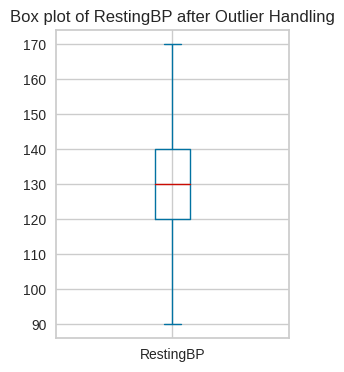

In [57]:
# outlier  resting bp
Q1_rbp = df['RestingBP'].quantile(0.25)
Q3_rbp = df['RestingBP'].quantile(0.75)
IQR_rbp = Q3_rbp - Q1_rbp
# Menentukan batas untuk data pencilan variabel rbp
lower_bound_rbp = Q1_rbp - 1.5 * IQR_rbp
upper_bound_rbp = Q3_rbp + 1.5 * IQR_rbp

df['RestingBP'] = np.where(df['RestingBP'] > upper_bound_rbp, lower_bound_rbp,
                                np.where(df['RestingBP'] < lower_bound_rbp, upper_bound_rbp , df['RestingBP']))

plt.figure(figsize=(3, 4))
df['RestingBP'].plot(kind='box')
plt.title('Box plot of RestingBP after Outlier Handling')
plt.show()

Dapat dilihat pada boxplot variabel RestingBP, tidak ada outlier lagi atau sudah diatasi outliernya, selanjutnya adalah variabel Age.

In [58]:
# Create arrays of Boolean values indicating the outlier rows
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers_c = df[(df['Age'] < lower) | (df['Age'] > upper)]
len(outliers_c) # banyak outliernya

7

Pada variabel age, outlier yang dihasilkan adalah 7, karena outlier pada variabel age sedikit, penanganan outlier yang dilakukan adalah menghapus outlier. 7 sample dapat dihapus karena jumlahnya masih sedikit jika dibandingkan dengan data total yaitu 918 sample.

In [59]:
df_no_outliers = df[(df['Age'] >= lower) & (df['Age'] <= upper)]

Selanjutnya, akan dilanjutkan dengan penangan outlier variabel MaxHR.

In [60]:
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers_c = df[(df['MaxHR'] < lower) | (df['MaxHR'] > upper)]
print(len(outliers_c)) # banyak outliernya

df_no_outliers = df_no_outliers[(df_no_outliers['MaxHR'] >= lower) & (df_no_outliers['MaxHR'] <= upper)]

2


Banyaknya outlier pada variabel maxHR adalah 2 sample, maka yang dilakukan adalah menghilangkan outlier.

In [61]:

Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers_c = df[(df['Oldpeak'] < lower) | (df['Oldpeak'] > upper)]
len(outliers_c) # banyak outliernya

16

Banyaknya outlier pada variabel oldpeak adalah 16 sample, masih cenderung sedikit dibandingkan dengan keseluruhan data maka yang dilakukan adalah menghilangkan outlier.

In [62]:
df_no_outliers = df_no_outliers[(df_no_outliers['Oldpeak'] >= lower) & (df_no_outliers['Oldpeak'] <= upper)]
len(df_no_outliers)

877

Setelah mengatasi outlier pada data numerik, data yang sudah tidak ada outlier terdapat 877 baris. Sample yang tidak terlalu banyak. Untuk memastikan outlier telah kita akan cek ulang apakah variabel sudah siap untuk lanjut ke tahap berikutnya.

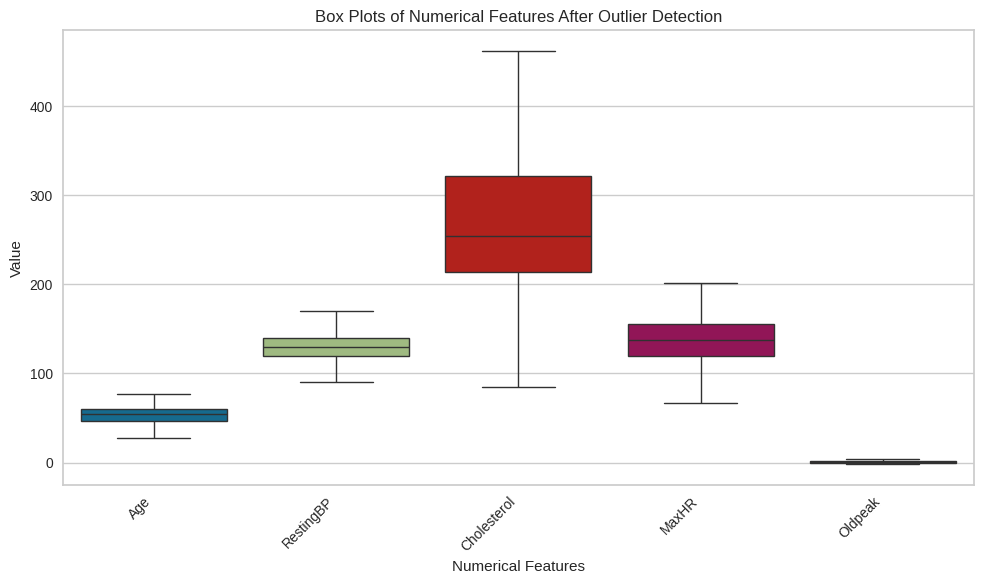

In [63]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[numerical_cols])

plt.title('Box Plots of Numerical Features After Outlier Detection')
plt.ylabel('Value')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Semua variabel numerik telah siap untuk dilakukan ke tahap berikutnya yaitu feature engineering.

Setelah semua variabel sudah siap, sebelum masuk ke dalam model, untuk memudahkan model klasifikasi, variabel kategorik perlu ditransformasi. Transformasi yang dilakukan adalah mengganti tipe data, yang awalnya dari type object (kategorik), menjadi type integer(numerik). Type integer ini berbeda dengan numerik, karena bilangan integer tidak memiliki koma. integer merupakan bilangan bulat. Untuk melakukan trnasformasi data, library yang diperlukan adalah `sklearn`. Pada tahap ini, variabel sex, chestpaintype, restingecg, excerciseangina dan stslope akan diubah type variabelnya menjadi integer. Tahapan transformasi data ditunjukkan pada code di bawah ini.

In [64]:
# transformasi
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_no_outliers['Sex'] = le.fit_transform(df_no_outliers['Sex'])
df_no_outliers['ChestPainType'] = le.fit_transform(df_no_outliers['ChestPainType'])
df_no_outliers['RestingECG'] = le.fit_transform(df_no_outliers['RestingECG'])
df_no_outliers['ExerciseAngina'] = le.fit_transform(df_no_outliers['ExerciseAngina'])
df_no_outliers['ST_Slope'] = le.fit_transform(df_no_outliers['ST_Slope'])
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 1 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             877 non-null    float64
 1   Sex             877 non-null    int64  
 2   ChestPainType   877 non-null    int64  
 3   RestingBP       877 non-null    float64
 4   Cholesterol     877 non-null    float64
 5   FastingBS       877 non-null    int64  
 6   RestingECG      877 non-null    int64  
 7   MaxHR           877 non-null    int64  
 8   ExerciseAngina  877 non-null    int64  
 9   Oldpeak         877 non-null    float64
 10  ST_Slope        877 non-null    int64  
 11  HeartDisease    877 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 89.1 KB


Variabel kategorik sudah ditransformasi menjadi bilangan integer. Maka, data sudah siap untuk dilakukan penyeleksian data untuk dimasukkan ke dalam model klasifikasi.

Pemilihan variabel data dapat menggunakan 3 cara, yaitu korelasi, feature importance dan shap. Penentuan variabel yang akan digunakan menggunakan korelasi sebagai berikut

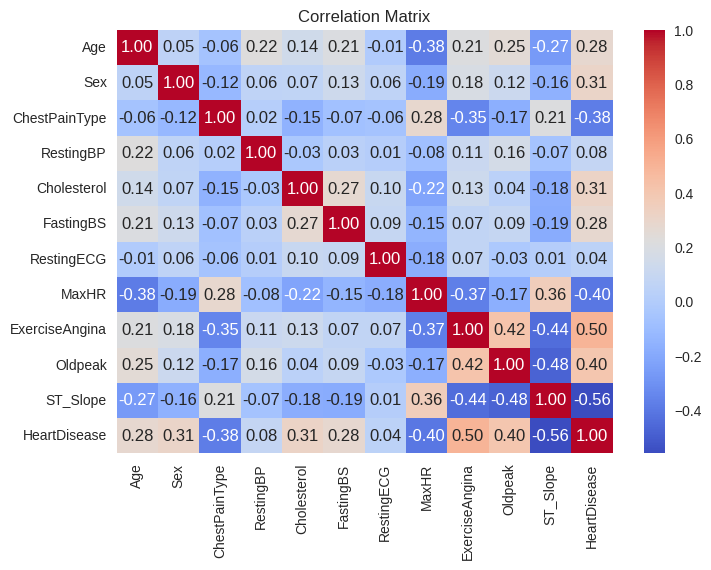

In [65]:
# korelasi
import seaborn as sns
sns.heatmap(df_no_outliers.corr(), annot=True,
            cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

yang digunakan adalah korelasi nilai yang paling tinggi dengan variabel heart disease. Urutan korelasi yang terbesar dengan heart disease adalah ST_slope sebesar -0,56, exercise angina dengan nilai 0,5. Variabel yang digunakan adalah korelasi yang tinggi atau lebih dari 0,5. ST slope memiliki hubungan negatif terhadap heart disease. korelasi st slope dengan heart disease sebesar 0,56 yang berarti hubungan linear kedua variabel tersebut lumayan kuat negatif.  excercise angina memiliki hubungan positif terhadap heart disease. korelasi excercise angina dengan heart disease sebesar 0,50 yang berarti hubungan linear kedua variabel tersebut lumayan kuat positif.  
<br><br>
Selanjutnya, akan memilih variabel menggunakan feature performance. Feature performance menghitung seberapa penting atau pengatuh atau kontribusi setiap variabel tersebut pada variabel target atau heart disease. Penentuan variabel feature performance dengan mengambil variabel yang memiliki nilai atau skor feature performance yang besar.

['ST_Slope', 0.5262897]
['ChestPainType', 0.11749022]
['ExerciseAngina', 0.07886804]
['Sex', 0.051937286]
['FastingBS', 0.0497923]
['Oldpeak', 0.04040199]
['Cholesterol', 0.029786948]
['MaxHR', 0.027528342]
['RestingECG', 0.027212983]
['RestingBP', 0.02697174]
['Age', 0.023720501]


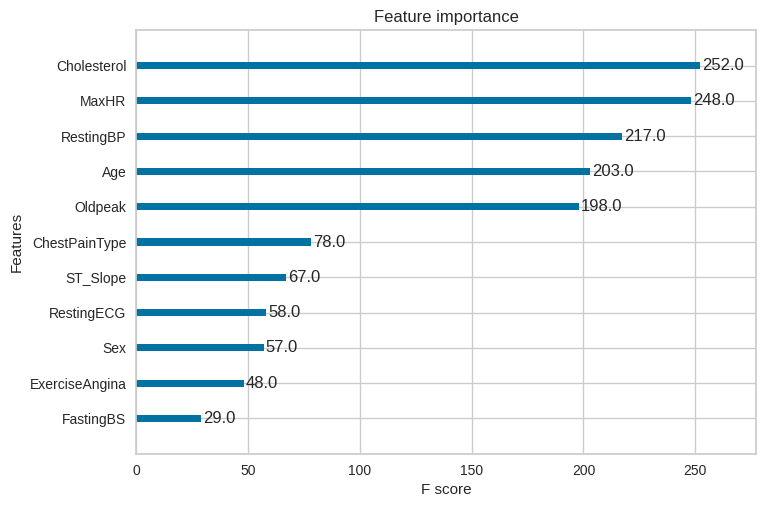

In [66]:
# Membagi variabel menjadi variabel dependent dan independent
X = df_no_outliers.drop('HeartDisease', axis=1)
y = df_no_outliers['HeartDisease']
# Membagi data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
# Mentraining model XGBOOST
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)

sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], model.feature_importances_[index]])
plot_importance(model, max_num_features = 15)
plt.show()


Berdasarkan pemilihan variabel menggunakan featur importance, variabel yang memiliki pengaruh atau kontribusi yang besar adalah cholesterol, max HR, resting BP, age dan oldpeak. Maka variabel yang akan digunakan adalah kelima variabel tersebut.

Senajutnya, akna melakukan pemilihan variabel dengan SHAP. SHAP adalah metode yang digunakan untuk mengukur kontribusi setiap fitur terhadap hasil prediksi model machine learning. SHAP menggunakan konsep seperti game. variabel merupakan pemain dan tujuan dari pemain itu adalah menang. dalam dalam konsep ini game yang dimaksud adalah menghasilkan prediksi yang akurat. Untuk menggunakan shap, memerlukan library `shap`.

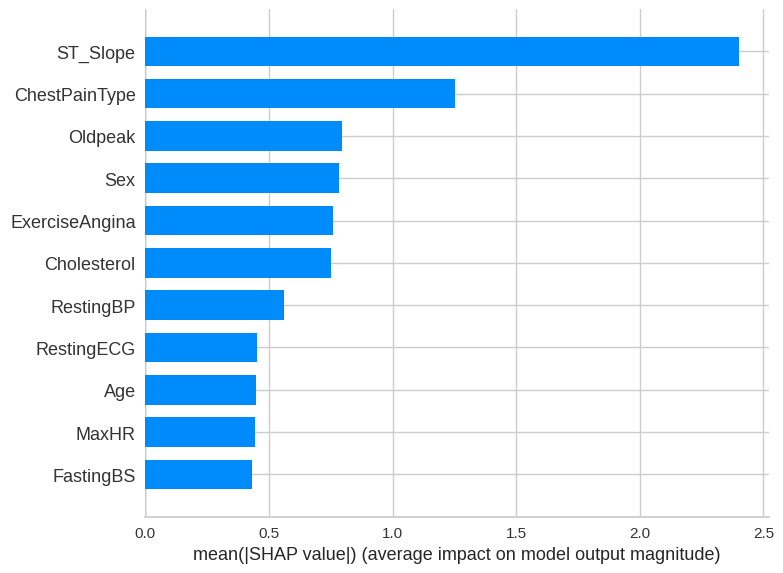

In [67]:
import shap
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)
# Menghitung skor SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Berdasarkan shap, ST slope mememiliki kontribusi yang dominan dibandingkan dengan variabel lain. untuk itu, akan menggunakan ST lope pada model shap nantinya. Maka dari itu, nanti tidak akan ada pemodelan SHAP karena perbedaan antara ST slope dengan variabel lainnya terlalu jauh. Sehingga, tidak akan memodelkan klasifikasi hanya menggunakan satu variabel.


Selanjutnya, untuk memilih model, perlu diketahui berapa variabel yang cocok untuk dimasukkan ke dalam model. untuk mencapai tujuan tersebut,, dapat menggunakan principal component analysis (PCA). PCA mengurangi dimensi data. jadi data yang digunakan dalam model bisa optimum, dan tidak ada informasi yang hilang. penentuan dengan PCA dengan melihat scree plot, yang mana jumlah variabel yang optimum adalah ketika grafik scree plotnya membentuk siku-siku.

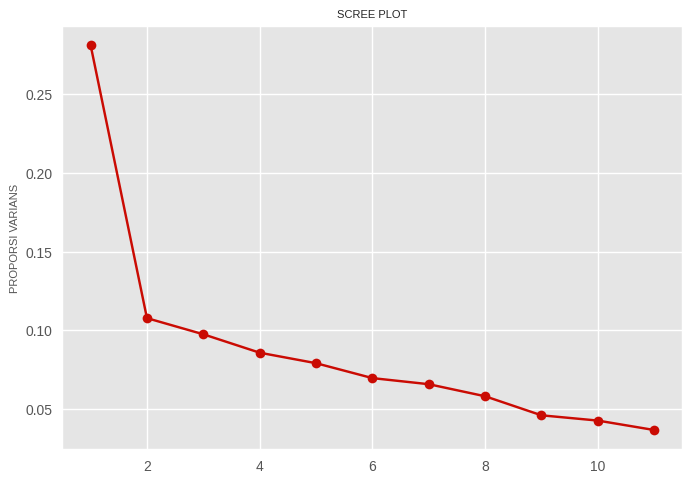

In [68]:
## PCA Principal Component analysis
from sklearn import preprocessing
from sklearn.decomposition import PCA
standardized_X = preprocessing.scale(df_no_outliers)
plt.style.use('ggplot')
pca = PCA(n_components=11)
# Hasil transformasi data
NewX = pca.fit_transform(standardized_X)
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, prop_var, 'ro-')
plt.title('SCREE PLOT', fontsize=8)
plt.ylabel('PROPORSI VARIANS', fontsize=8)
plt.show()

Scree plot pada PCA menghasilkan bahwa pada data, vairabel yang cocok dimasukkan ke dalam model adalah 2 variabel. Maka, untuk pembuatan model, variabel yang akan dicoba adalah 2 variabel. Setelah mengetahui berapa banyak variabel dan variabel apa saja yang akan digunakan pada model. Tahap berikutnya adalah memodelkan model klasifikasi. Model klasifikasi yang akan digunakan adalah decision tree dengan library `sklearn`dan model klasifikasi dengan bantuan `pycaret`.

Model yang akan pertama kali dibuat adalah model dengan semua variabel. Model ini akan digunakan sebagai pembanding model-model yang lainnya. Sebagai pembanding model-model klasifikasi, akan menggunakan akurasi sebagai pembanding utama.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = DecisionTreeClassifier(criterion='gini', max_depth=7)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7443181818181818
Precision: 0.813953488372093
Recall: 0.7070707070707071
F1-Score: 0.7567567567567568
AUC-ROC: 0.7496392496392497


Berdasarkan model decision tree semua variabel untuk memprediksi heart disease, model decision tree tersebut mmemiliki nilai akurasi memprediksi benar sebesar 73,86%. Dari semua prediksi positif yang dibuat (presisi), 80.5% benar-benar positif. Dari semua data yang seharusnya positif (recall), model menghasilkan 70,7% benar. Keseimbangan model dapat dilihat dengan F1 score sebesar 75,26%.

Selanjutnya menggunakan variabel  st_slope, excercise angina yang ditemukan pada korelasi.

In [70]:
df_cor = df_no_outliers[['ST_Slope', 'ExerciseAngina','HeartDisease']]
X_cor = df_cor.drop('HeartDisease', axis=1) # matriks variabel independen
y_cor = df_cor['HeartDisease'] # vektor target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cor, y_cor,test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7670454545454546
Precision: 0.7735849056603774
Recall: 0.8282828282828283
F1-Score: 0.8
AUC-ROC: 0.7582972582972584


Berdasarkan model decision tree dari korelasi untuk memprediksi heart disease, model decision tree tersebut memiliki nilai akurasi memprediksi benar sebesar 76,70%. Dari semua prediksi positif yang dibuat (presisi), 77,35% benar-benar positif. Dari semua data yang seharusnya positif (recall), model menghasilkan 82,82% benar. Keseimbangan model dapat dilihat dengan F1 score sebesar 80%. Model ini lebih besar akurasinya dibandingkan dengan model dengan semua variabel.

Selanjutnya menggunakan variabel cholesterol dan maxHR yang ditemukan pada feature importance.

In [71]:
df_fi = df_no_outliers[['Cholesterol', 'MaxHR','HeartDisease']]
X_fi = df_fi.drop('HeartDisease', axis=1) # matriks variabel independen
y_fi = df_fi['HeartDisease'] # vektor target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fi, y_fi,test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7613636363636364
Precision: 0.7478260869565218
Recall: 0.8686868686868687
F1-Score: 0.8037383177570093
AUC-ROC: 0.746031746031746


Berdasarkan model decision tree dari feature importance untuk memprediksi heart disease, model decision tree tersebut memiliki nilai akurasi memprediksi benar sebesar 76,70%. Dari semua prediksi positif yang dibuat (presisi), 75% benar-benar positif. Dari semua data yang seharusnya positif (recall), model menghasilkan 87,87% benar. Keseimbangan model dapat dilihat dengan F1 score sebesar 80,93%. Model ini lebih besar akurasinya dibandingkan dengan model dengan semua variabel. Model ini tidak memiliki akurasi lebih bagus dibandingkan dengan model korelasi. Pada model ini, yang dipilih adalah 2 variabel tertinggi karena menggunakan acuan PCA. Untuk melihat variabel yang memiliki pengaruh pada model, maka akan memodelkan menggunakan kelima variabel yang tertinggi pada feature importance. Selanjutnya pemodelan decision tree menggunakan variabel cholesterol dan maxHR, restingBP, age dan oldpeak.

In [72]:
df_fi2 = df_no_outliers[['Cholesterol', 'MaxHR','RestingBP','Age','Oldpeak','HeartDisease']]
X_fi2 = df_fi2.drop('HeartDisease', axis=1) # matriks variabel independen
y_fi2 = df_fi2['HeartDisease'] # vektor target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fi2, y_fi2,test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8011363636363636
Precision: 0.8478260869565217
Recall: 0.7878787878787878
F1-Score: 0.8167539267015707
AUC-ROC: 0.803030303030303


Berdasarkan model decision tree kelima variabel tertinggi dari feature importance untuk memprediksi heart disease, model decision tree tersebut memiliki nilai akurasi memprediksi benar sebesar 80,11%. Dari semua prediksi positif yang dibuat (presisi), 84,78% benar-benar positif. Dari semua data yang seharusnya positif (recall), model menghasilkan 78,78% benar. Keseimbangan model dapat dilihat dengan F1 score sebesar 81,67%. Model ini lebih besar akurasinya dibandingkan dengan model dengan semua variabel. Model feature importance kelima variabel lebih bagus akusasinya dibandingkan semua model yang telah dimodelkan. Sejauh ini, model Decision tree kelima variabel feature importance merupakan model terbaik.

Selanjutnya menggunakan variabel semua variabel untuk mencari model terbaik menggunakan `pycaret`.

In [73]:
from pycaret.classification import *

In [ ]:
clf = setup(data=df_no_outliers, target='HeartDisease', session_id=123)

# Bandingkan model dan pilih yang terbaik
best_model = compare_models()

# Tampilkan hasil evaluasi model terbaik
#print(best_model)


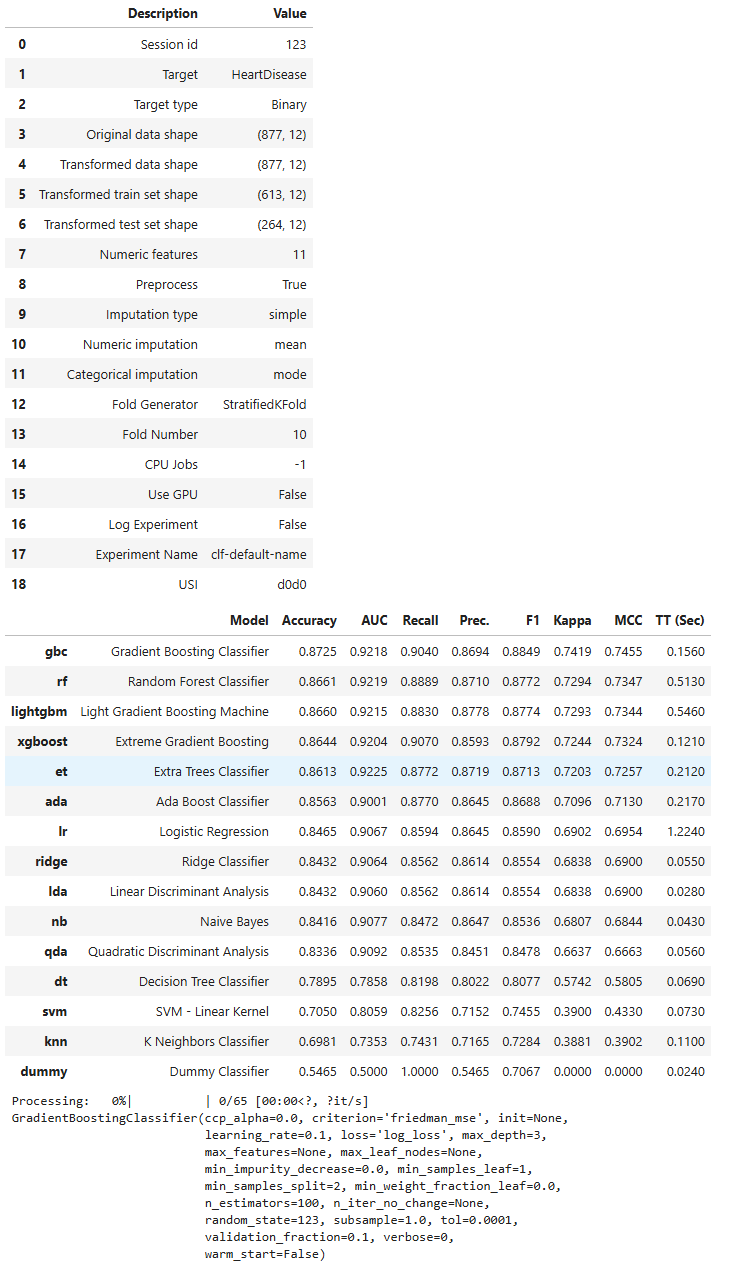

In [75]:
from IPython.display import Image, display

# Display an image from a local file
display(Image("Screenshot 2025-05-21 191427.png", width=500))

Berdasarkan model klasifikasi menggunakan `pycaret` pada semua model, model yang terbaik secara akurasi adalah model gradient boosting classification sebesar 87,25%. Model berhasil menangkap 90,40% dari semua data positif yang sebenarnya (recall). Dari semua prediksi positif yang dibuat model, 86,94% benar-benar positif (precision), menunjukkan bahwa model juga tidak banyak menghasilkan false positives. Dan model memiliki keseimbangan yang baik sebesar 88,49%.
Sejauh ini, model ini merupakan yang terbaik. Untuk membuat model dengan variabel lain, model tersebut dilihat feature importancenya, dan memilih nilai yang besar.

In [76]:
#pip install pycaret

In [77]:
best_model.feature_importances_

array([0.02024646, 0.04762322, 0.14820456, 0.02023663, 0.10079747,
       0.03700058, 0.01136456, 0.10812609, 0.04563866, 0.08523982,
       0.37552196])

In [78]:
best_model.feature_names_in_

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope'], dtype=object)

Berdasarkan feature importance pada model tersebut, akan membuat model baru menggunakan `pycaret` juga. Variabel yang memiliki nilai feature importance lebih dari 0,1 adalah chest pain type, cholesterol, maxHR, oldpeak dan st slope. Berikut pemodelan dengan kelima variabel tersebut.

In [ ]:
mfi = df_no_outliers[['ChestPainType', 'Cholesterol', 'MaxHR','Oldpeak','ST_Slope','HeartDisease']]
clf = setup(data=mfi , target='HeartDisease', session_id=123)

# Bandingkan model dan pilih yang terbaik
best_model = compare_models()

# Tampilkan hasil evaluasi model terbaik
#print(best_model)

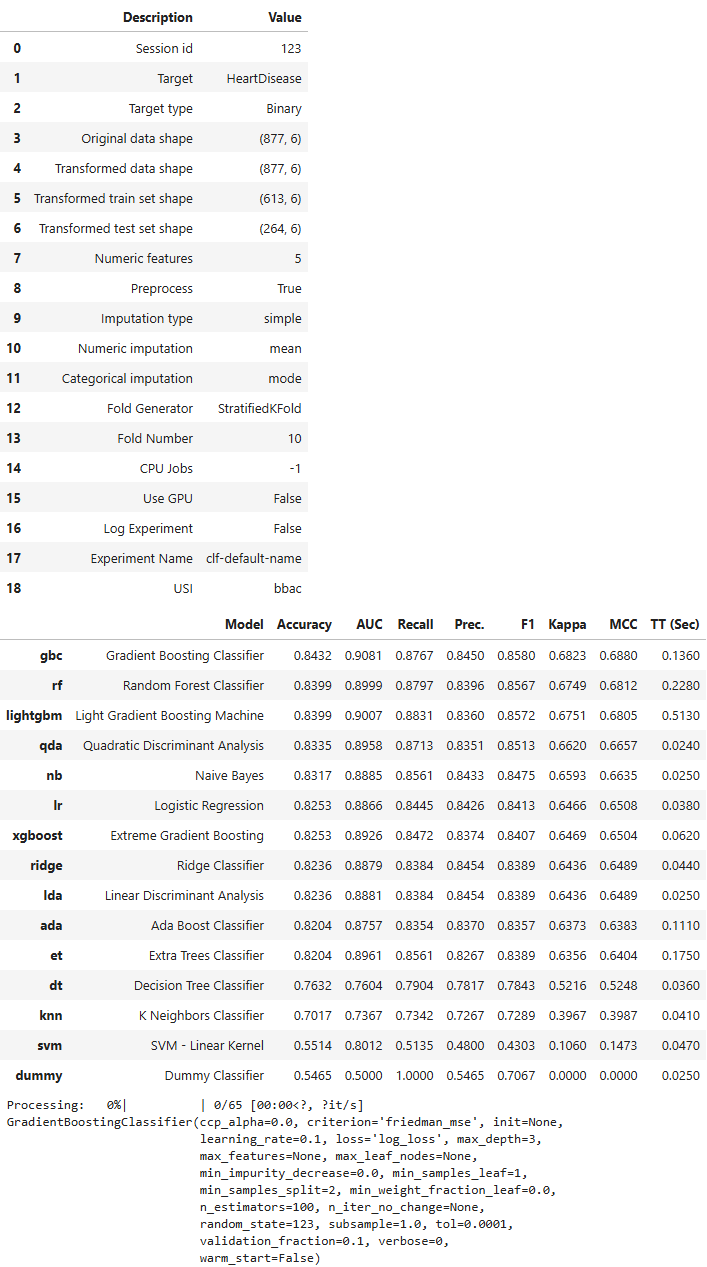

In [82]:
display(Image("Screenshot 2025-05-21 191712.png", width=500))

Berdasarkan hasil model `pycaret` menggunakan variabel dengan skor feature importance, model yang terbaik yang dihasilkan adalah model klasifikasi dengan greadient boosting classifier dengan akurasi sebesar 84,32%. Model berhasil menangkap 87.7% dari semua data positif yang sebenarnya. Dari semua prediksi positif yang dibuat model, 84.5% benar-benar positif, menunjukkan bahwa model juga tidak banyak menghasilkan false positives. Dan model memiliki keseimbangan yang baik sebesar 85,8%.

Model ini secara akurasi lebih buruk dibandingkan dengan model `pycaret` semua variabel. Model Decision tree hanya mampu memprediksi dengan akurasi sebanyak 80%an. Maka dibandingkan dengan semua model yang telah di buat, model yang terbaik adalah model Gradient Boosting Classifier	dengan semua variabel yang didapatkan oleh `pycaret`.